In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm

font_path = "./new_fonts"
fonts = os.listdir(font_path)        

In [3]:
fonts.remove('batang.ttc')
fonts.remove('gulim.ttc')
fonts.remove('HMFMMUEX.TTC')
print(fonts)

['HMFMOLD.TTF', 'HMFMPYUN.TTF', 'HMKMAMI.TTF', 'HMKMMAG.TTF', 'HMKMRHD.TTF', 'malgun.ttf', 'malgunbd.ttf', 'malgunsl.ttf', 'NGULIM.TTF']


In [4]:
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")

Hangul_Syllables = [a+b+c+d 
                    for a in co 
                    for b in co 
                    for c in co 
                    for d in co]

Hangul_Syllables = np.array(Hangul_Syllables)

s = np.where(start == Hangul_Syllables)[0][0]
e = np.where(end == Hangul_Syllables)[0][0]

Hangul_Syllables = Hangul_Syllables[s : e + 1]

In [5]:
print(Hangul_Syllables)

['AC00' 'AC01' 'AC02' ... 'D7A1' 'D7A2' 'D7A3']


In [6]:
print(chr(int('AC00', 16)), chr(int("D7A3", 16)))

가 힣


각


C:\Users\sangjin\AppData\Local\Temp\ipykernel_16588\674777710.py:8: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  x, y = font.getsize(unicodeChars)


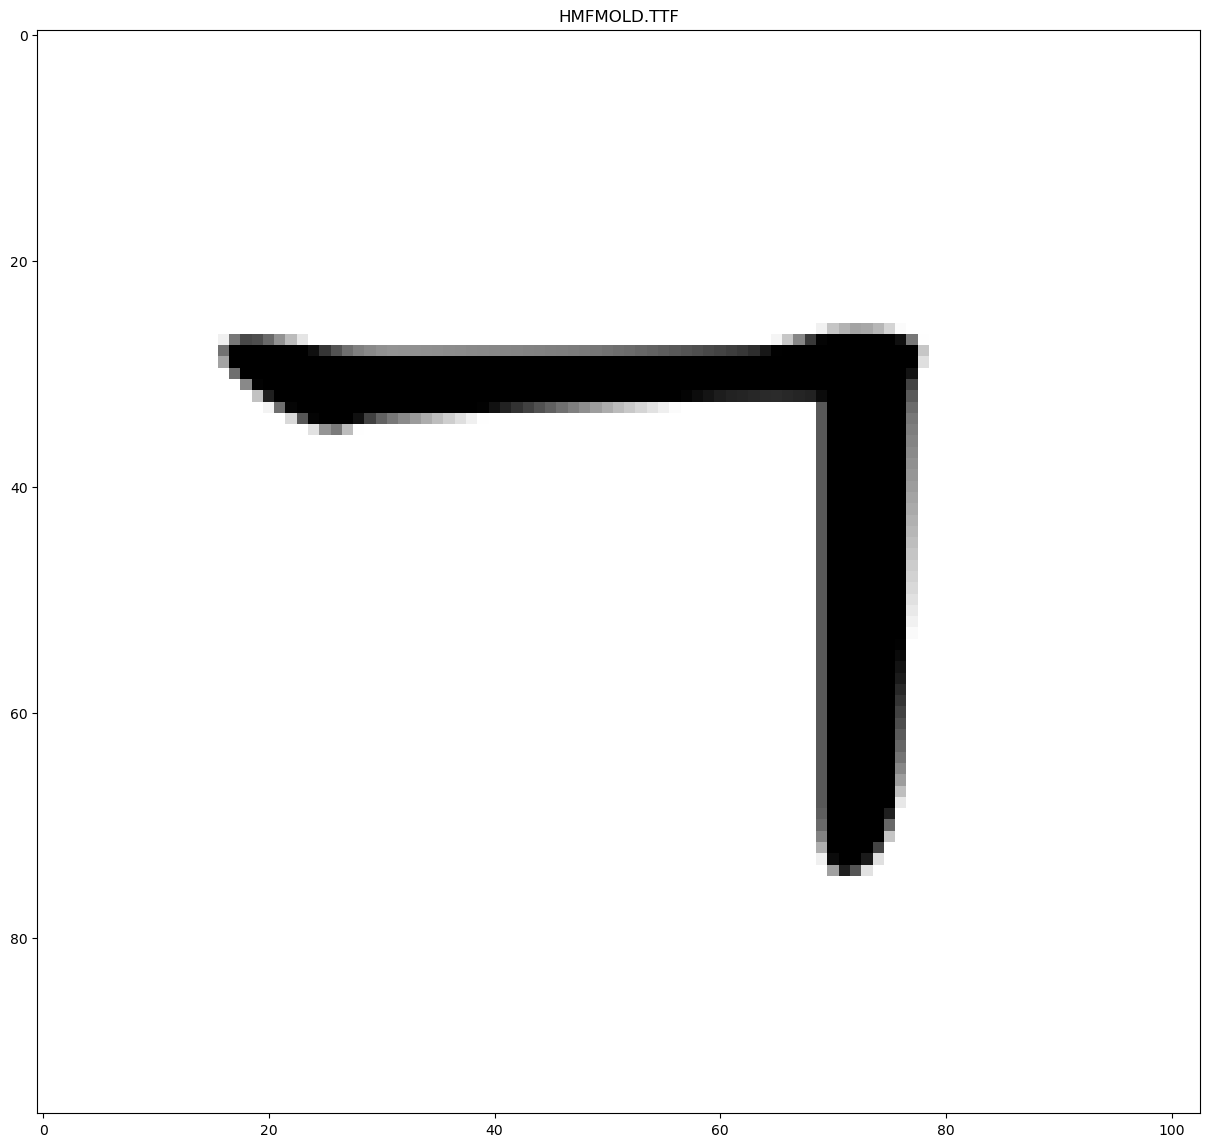

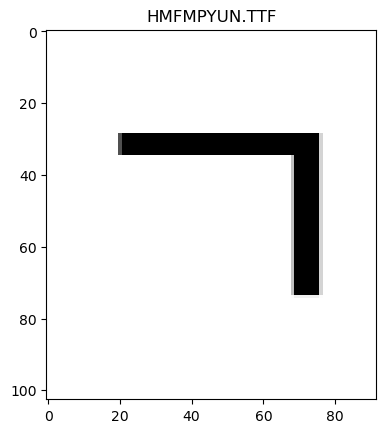

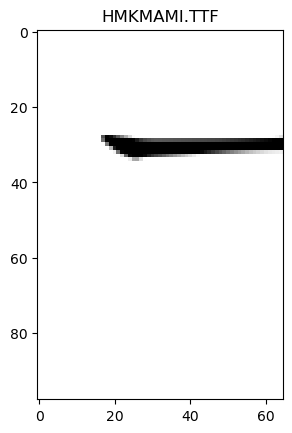

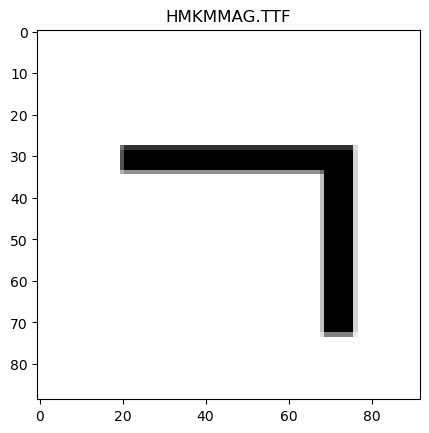

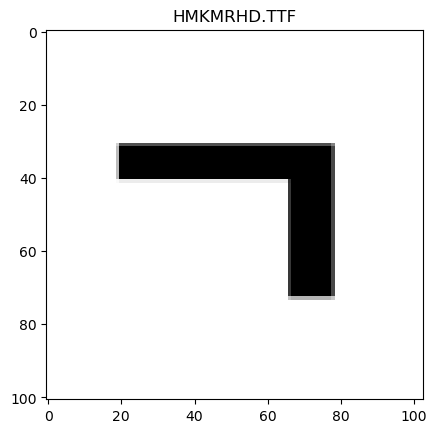

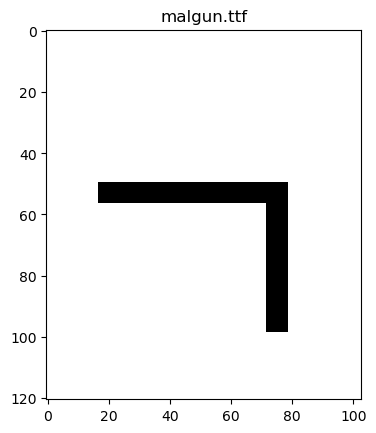

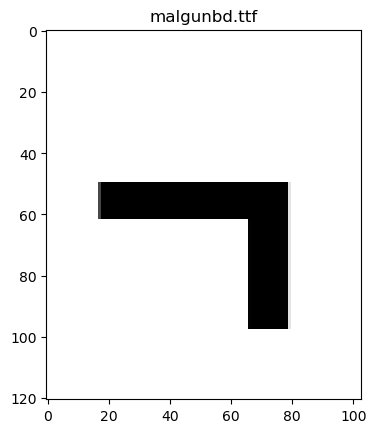

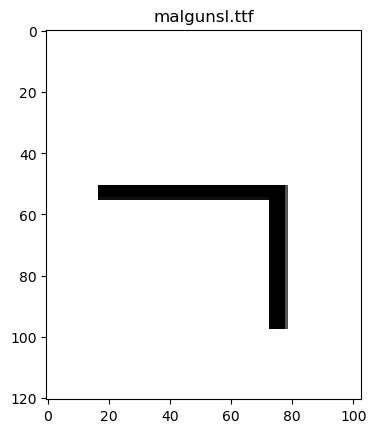

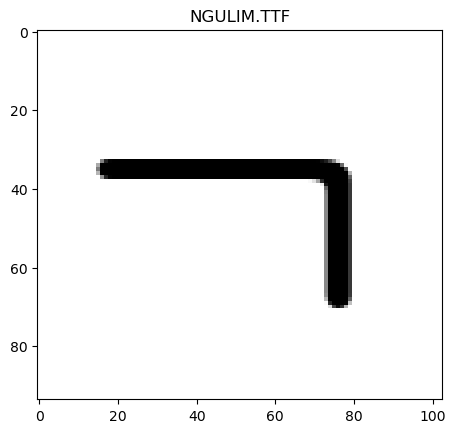

In [11]:
unicodeChars = chr(int(Hangul_Syllables[1], 16))
print(unicodeChars)
plt.figure(figsize=(15, 15))

for idx, ttf in enumerate(fonts):
    font = ImageFont.truetype(ttf, size = 100)# 이미지로 출력할 글자 및 폰트 지정

    x, y = font.getsize(unicodeChars) 
    
    theImage = Image.new('RGB', (x + 3, y + 3), color='white') # 이미지 객체 생성

    theDrawPad = ImageDraw.Draw(theImage)  #이미지 객체를 그리기 위해 draw을 이용

    theDrawPad.text((0, 0), 'ㄱ', font=font, fill='black')  
    
    '''
# 가운데에 그리기 (폰트 색: 하양)
draw = ImageDraw.Draw(canvas)
w, h = font.getsize(draw_text)
draw.text(((text_width-w)/2.0,(text_height-h)/2.0), draw_text, 'white', font)
'''
    
    plt.title(str(ttf))
    
    plt.imshow(theImage)
    
    plt.show()
